# 1. Descarga y exploración del corpus

## Importar librerías necesarias

In [1]:
!pip install -r requirements.txt
!pip install utils.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pyldavis to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 28.4 MB/s eta 0:

In [66]:
from utils import *
from preprocessing import *

In [3]:
import random
import json
import gzip
import shutil
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from time import time  # Tiempo de las operaciones
from nltk import ngrams, FreqDist
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [5]:
download_nltk_spacy_data()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Descargar los Datos

El siguiente comando descarga el conjunto de datos de reviews de Amazon para la categoría Deporte y Aire Libre desde el repositorio online. Es el primer paso para obtener los datos necesarios para nuestro análisis.

🔗 [Enlace al link de descarga](https://amazon-reviews-2023.github.io/)

In [ ]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Sports_and_Outdoors.jsonl.gz

--2024-03-21 20:29:16--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Sports_and_Outdoors.jsonl.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2664911652 (2.5G) [application/x-gzip]
Saving to: ‘Sports_and_Outdoors.jsonl.gz’

Sports_and_Outdoors 100%[===================>]   2.48G  2.05MB/s    in 27m 3s  

2024-03-21 20:56:25 (1.57 MB/s) - ‘Sports_and_Outdoors.jsonl.gz’ saved [2664911652/2664911652]



In [6]:
# !wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Sports_and_Outdoors.jsonl.gz   # 2ª descarga para obtener df balanceado

--2024-03-27 07:47:32--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Sports_and_Outdoors.jsonl.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2664911652 (2.5G) [application/x-gzip]
Saving to: ‘Sports_and_Outdoors.jsonl.gz’

Sports_and_Outdoors 100%[===================>]   2.48G  1.85MB/s    in 28m 58s 

2024-03-27 08:16:36 (1.46 MB/s) - ‘Sports_and_Outdoors.jsonl.gz’ saved [2664911652/2664911652]



## Carga y Exploración Inicial

El siguiente fragmento de código nos permite echar un vistazo inicial a los datos, explorando las primeras 10 entradas para entender la estructura y el tipo de información que contienen las reviews.

In [7]:
file = "Sports_and_Outdoors.jsonl.gz"  # Archivo descargado
with gzip.open(file, 'rt', encoding='utf-8') as fp:
    for i, line in enumerate(fp):
        if i < 10:  # Muestra solo las primeras 10 líneas
            print(json.loads(line.strip()))

{'rating': 5.0, 'title': 'Crazy comfy!', 'text': 'Not gonna lie- they are not much to look at. Lol. Luckily I’m one of those ppl that values things for function over looks & these function well so far. They are seriously one of the most comfortable pairs of socks I’ve owned in 5 decades.  I have not tried to wash them yet, so fingers crossed on that rn.  They feel very cushiony.  I wear them in my winter boots & just on my feet shoeless around my home.  I wish they came in more colors.  I’m one of those ppl that absolutely cannot stand toe seams on socks, but these have not bothered me at all.  I have super high arches so the only change I would make to the socks would be some compression there.  However, the socks fit perfectly as-is which really surprised me given my arches.  I just like having compression at my arches bc it feels good on them.  I wear a ladies 10-1/2 shoe- mens 8-1/2 and I bought the medium socks. They fit perfectly.  That’s never happened.  I had honestly expected 

Tras leer el archivo, tomamos una muestra aleatoria:

In [9]:
sample_size = 10000  # Tamaño de la muestra deseada
file_path = 'Sports_and_Outdoors.jsonl.gz'  # Ruta al archivo descargado

# Inicializamos una lista para almacenar los elementos de la muestra
sample = []

# Abrimos y leemos el archivo
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i < sample_size:
            # Directamente añadir las primeras 'sample_size' líneas a la muestra
            sample.append(json.loads(line.strip()))
        else:
            # Con probabilidad 'sample_size/i', reemplaza un elemento aleatorio
            r = random.randint(0, i)
            if r < sample_size:
                sample[r] = json.loads(line.strip())

# Convierte la lista de diccionarios a un DataFrame
sample_df = pd.DataFrame(sample)

# Muestra las primeras filas de la muestra para verificación
print(sample_df.head())

   rating        title                                               text  \
0     5.0        Solid                          Solid product. Very happy   
1     5.0  Great Wraps  Actually very nice straps and good support for...   
2     5.0      Perfect  It’s exactly how it’s pictured and has great g...   
3     5.0   Five Stars                                     Great product.   
4     5.0  Great Value              Worked great on my last fishing trip.   

  images        asin parent_asin                       user_id      timestamp  \
0     []  B000B8PPCE  B000B8PPCE  AE34JSTEQJYLZ66P4NQ3XAEVB2LA  1562694920921   
1     []  B00PD09CJM  B00PD09ASU  AEXG43NY7LTNISGKZJQECC2K23ZA  1627580309240   
2     []  B08G1NTVZW  B08G1NTVZW  AG3ZF2Z3DULTQ2BLEJEN6STGMM5A  1628194390860   
3     []  B00E63LQD2  B00E63LQD2  AG3ERGZIIQGMDKIQCLUPXSFX2WGA  1405963520000   
4     []  B07T9CL1SQ  B07T9CL1SQ  AHIM7LWT5GC44KE57B564BGS6RJQ  1600459672911   

   helpful_vote  verified_purchase  
0            

Tras percibir que la muestra no estaba balanceda, decidimos añadir esta celda:

In [10]:
file_path = 'Sports_and_Outdoors.jsonl.gz'  # Ruta al archivo descargado
num_samples_per_rating = 10000  # Número de muestras por puntuación

# Inicializamos un diccionario para almacenar los elementos por puntuación
samples_by_rating = {1: [], 2: [], 3: [], 4: [], 5: []}

# Leer el archivo y almacenar las reseñas según su puntuación
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        review = json.loads(line.strip())
        rating = review['rating']

        # Solo proceder si aún necesitamos más muestras para esta puntuación
        if len(samples_by_rating[rating]) < num_samples_per_rating:
            samples_by_rating[rating].append(review)

        # Verificar si ya hemos recolectado suficientes reseñas para cada puntuación
        if all(len(reviews) >= num_samples_per_rating for reviews in samples_by_rating.values()):
            break  # Salir del bucle una vez que todas las puntuaciones tienen suficientes muestras

# Recolectar las muestras de cada puntuación en una lista
sampled_reviews = [review for reviews in samples_by_rating.values() for review in reviews]

# Convertir la lista de diccionarios a un DataFrame
sample_df_balanced = pd.DataFrame(sampled_reviews)

# Muestra las primeras filas de la muestra para verificación
print(sample_df_balanced.head())

   rating                                              title  \
0     1.0             Team emblem was affixed upside down...   
1     1.0                                  Hardest to use...   
2     1.0                    Broke immediately can't be used   
3     1.0  Black is cracking and falling off after 2 days...   
4     1.0                                       Disappointed   

                                                text images        asin  \
0  The travel mug was OK, not bad but the coffee ...     []  B00NAXGYXQ   
1  I'm terrible with planks so I was terrible at ...     []  B0176037O2   
2  Drawstring immediately ripped inches of stitch...     []  B01NBHBZ6D   
3  The black face is cracking and falling off aft...     []  B08H5V23NH   
4         Leaves white stuff in your hair. Not good!     []  B0013FU218   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B013BTENMC  AGKASBHYZPGTEPO6LWZPVJWB2BVA  1471551453000             0   
1  B09FKVW4X

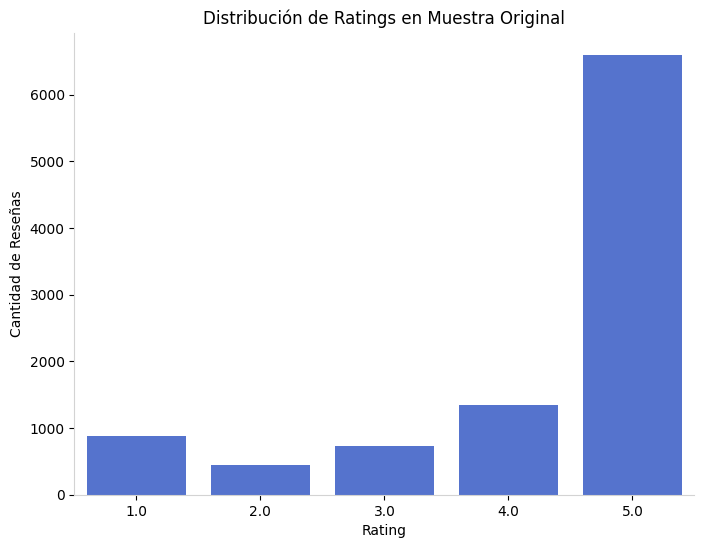

In [46]:
# Para el DataFrame sin balancear
plot_distribution(sample_df, "rating", "Distribución de Ratings en Muestra Original", "Rating", "Cantidad de Reseñas")

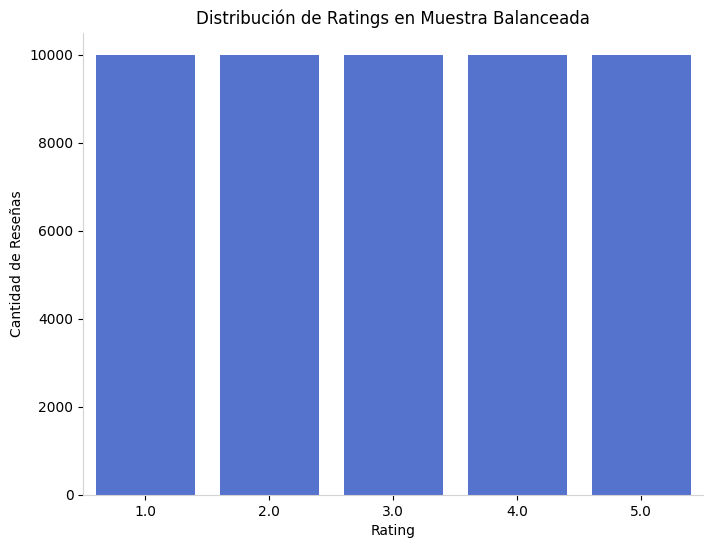

In [47]:
# Para el DataFrame balanceado
plot_distribution(sample_df_balanced, "rating", "Distribución de Ratings en Muestra Balanceada", "Rating", "Cantidad de Reseñas")

## Guardar los datos

Guardamos la muestra para facilitar su acceso:

In [20]:
# Guardar los datos localmente para después descargarlos
save_data_local(sample_df, "sample_data.csv")
save_data_local(sample_df_balanced, "sample_data_balanced.csv")

DataFrame guardado localmente como: sample_data.csv
DataFrame guardado localmente como: sample_data_balanced.csv


In [ ]:
# o guardar los archivos en Drive
#save_data_drive(sample_df, "sample_data.csv")
#save_data_drive(sample_df_balanced, "sample_data_balanced.csv")

## Cargar los datos

In [33]:
df = load_data("sample_data.csv")
df_balanced = load_data("sample_data_balanced.csv")

In [34]:
print(df.head()) # Ver las primeras filas para confirmar la carga correcta

   rating        title                                               text  \
0     5.0        Solid                          Solid product. Very happy   
1     5.0  Great Wraps  Actually very nice straps and good support for...   
2     5.0      Perfect  It’s exactly how it’s pictured and has great g...   
3     5.0   Five Stars                                     Great product.   
4     5.0  Great Value              Worked great on my last fishing trip.   

  images        asin parent_asin                       user_id      timestamp  \
0     []  B000B8PPCE  B000B8PPCE  AE34JSTEQJYLZ66P4NQ3XAEVB2LA  1562694920921   
1     []  B00PD09CJM  B00PD09ASU  AEXG43NY7LTNISGKZJQECC2K23ZA  1627580309240   
2     []  B08G1NTVZW  B08G1NTVZW  AG3ZF2Z3DULTQ2BLEJEN6STGMM5A  1628194390860   
3     []  B00E63LQD2  B00E63LQD2  AG3ERGZIIQGMDKIQCLUPXSFX2WGA  1405963520000   
4     []  B07T9CL1SQ  B07T9CL1SQ  AHIM7LWT5GC44KE57B564BGS6RJQ  1600459672911   

   helpful_vote  verified_purchase  
0            

In [35]:
print(df.describe())

             rating     timestamp  helpful_vote
count  10000.000000  1.000000e+04  10000.000000
mean       4.232200  1.541484e+12      1.010500
std        1.286254  9.115585e+10      7.690026
min        1.000000  1.149337e+12      0.000000
25%        4.000000  1.474387e+12      0.000000
50%        5.000000  1.555512e+12      0.000000
75%        5.000000  1.615480e+12      0.000000
max        5.000000  1.694112e+12    358.000000


In [36]:
print(df.info()) # Información sobre los tipos de datos y memoria usada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             10000 non-null  float64
 1   title              9999 non-null   object 
 2   text               9999 non-null   object 
 3   images             10000 non-null  object 
 4   asin               10000 non-null  object 
 5   parent_asin        10000 non-null  object 
 6   user_id            10000 non-null  object 
 7   timestamp          10000 non-null  int64  
 8   helpful_vote       10000 non-null  int64  
 9   verified_purchase  10000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 713.0+ KB
None


Tras obtener la muestra balanceada, observamos los datos:

In [37]:
print(df_balanced.head())

   rating                                              title  \
0     1.0             Team emblem was affixed upside down...   
1     1.0                                  Hardest to use...   
2     1.0                    Broke immediately can't be used   
3     1.0  Black is cracking and falling off after 2 days...   
4     1.0                                       Disappointed   

                                                text images        asin  \
0  The travel mug was OK, not bad but the coffee ...     []  B00NAXGYXQ   
1  I'm terrible with planks so I was terrible at ...     []  B0176037O2   
2  Drawstring immediately ripped inches of stitch...     []  B01NBHBZ6D   
3  The black face is cracking and falling off aft...     []  B08H5V23NH   
4         Leaves white stuff in your hair. Not good!     []  B0013FU218   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B013BTENMC  AGKASBHYZPGTEPO6LWZPVJWB2BVA  1471551453000             0   
1  B09FKVW4X

In [38]:
print(df_balanced.describe())

             rating     timestamp  helpful_vote
count  50000.000000  5.000000e+04  50000.000000
mean       3.000000  1.549617e+12      1.452560
std        1.414228  8.835143e+10     11.026264
min        1.000000  9.968092e+11      0.000000
25%        2.000000  1.486323e+12      0.000000
50%        3.000000  1.565634e+12      0.000000
75%        4.000000  1.620618e+12      1.000000
max        5.000000  1.679189e+12   1409.000000


In [39]:
print(df_balanced.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             50000 non-null  float64
 1   title              49999 non-null  object 
 2   text               49998 non-null  object 
 3   images             50000 non-null  object 
 4   asin               50000 non-null  object 
 5   parent_asin        50000 non-null  object 
 6   user_id            50000 non-null  object 
 7   timestamp          50000 non-null  int64  
 8   helpful_vote       50000 non-null  int64  
 9   verified_purchase  50000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 3.5+ MB
None


Trabajaremos ahora con `df_balanced`.

In [42]:
# Eliminamos valores NaN
df_balanced['text'] = df_balanced['text'].fillna('')
df_balanced['title'] = df_balanced['title'].fillna('')

nan_count = df_balanced['text'].isnull().sum()
nan_count_title = df_balanced['title'].isnull().sum()

print(f"Número de valores NaN en 'text': {nan_count}")
print(f"Número de valores NaN en 'title': {nan_count_title}")

Número de valores NaN en 'text': 0
Número de valores NaN en 'title': 0


## Preparamos los datos

Para el cálculo inicial de la cardinalidad del vocabulario y otros análisis EDA, vamos a trabajar con los datos "crudos" para tener una imagen completa del conjunto de datos original.

## 1.1 Cardinalidad del Vocabulario

In [ ]:
# Tokenizamos el texto
words = [word for text in df['text'] for word in word_tokenize(text)]
vocab = Counter(words)

print(f"Número total de palabras únicas: {len(vocab)}")

Número total de palabras únicas: 19683


In [43]:
# Tokenizamos el texto
words = [word for text in df_balanced['text'] for word in word_tokenize(text)]
vocab = Counter(words)

print(f"Número total de palabras únicas: {len(vocab)}")

Número total de palabras únicas: 62036


In [44]:
# Obtenemos la distribución de frecuencia
freq_dist = FreqDist(words)

# Imprimimos las palabras más comunes
most_common_words = freq_dist.most_common(50)
print(most_common_words)

[('.', 185712), ('the', 131501), (',', 97310), ('I', 96722), ('to', 84330), ('and', 82302), ('a', 82127), ('it', 76982), ('is', 54778), ('for', 42755), ('/', 42178), ('>', 41929), ('br', 41900), ('<', 41898), ('of', 41864), ('in', 32611), ('this', 31797), ('that', 29209), ('on', 28026), ('my', 26100), ('but', 26097), ('not', 26029), ('with', 24303), ('The', 23739), ('you', 23584), ('have', 21694), ('was', 21655), ('are', 20739), ('It', 19752), ("n't", 19040), ('as', 16428), ('!', 16086), ('be', 15613), ('so', 15158), ("'s", 14000), ('’', 13933), ('they', 12993), ('like', 12527), ('one', 12200), ('or', 12166), ('This', 11593), ('would', 11518), ('up', 11428), ('very', 11352), ('use', 11220), ('do', 10976), ('at', 10257), ('can', 10237), ('just', 10105), ('them', 10086)]


## 1.2 Distribución de Reviews por Número de Estrellas

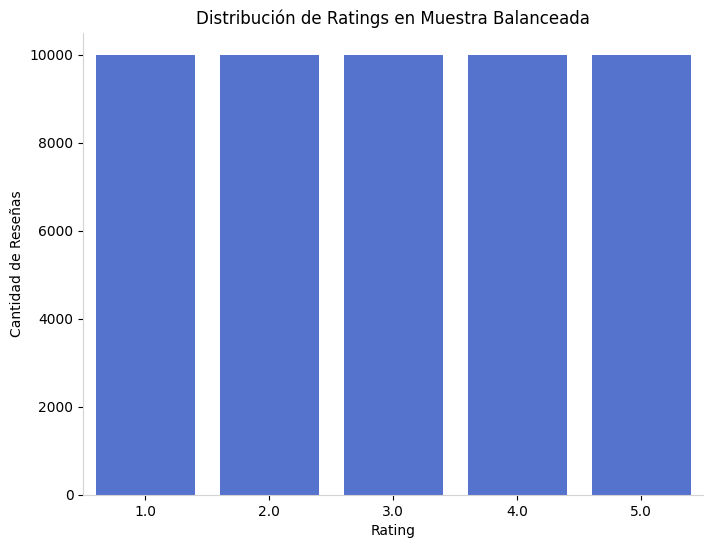

In [48]:
plot_distribution(sample_df_balanced, "rating", "Distribución de Ratings en Muestra Balanceada", "Rating", "Cantidad de Reseñas")

## 1.3 Número de Reviews Positivas y Negativas

In [49]:
df['sentiment'] = df['rating'].apply(lambda x: 'positiva' if x >= 4 else 'negativa')
sentiment_counts = df['sentiment'].value_counts()

print(sentiment_counts)

positiva    7942
negativa    2058
Name: sentiment, dtype: int64


In [50]:
df_balanced['sentiment'] = df_balanced['rating'].apply(lambda x: 'positiva' if x >= 4 else 'negativa')
sentiment_counts_b = df_balanced['sentiment'].value_counts()

print(sentiment_counts_b)

negativa    30000
positiva    20000
Name: sentiment, dtype: int64


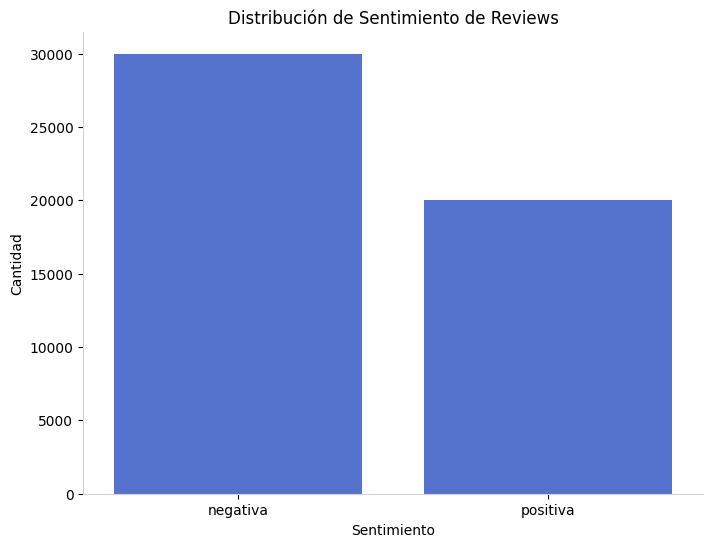

In [52]:
plot_distribution(df_balanced, "sentiment", "Distribución de Sentimiento de Reviews", "Sentimiento", "Cantidad")

##1.4 N-grams más Frecuentes

In [53]:
# Generar bigrams para todo el texto
bigrams = ngrams(words, 2)
freq_dist_bigrams = FreqDist(bigrams)
common_bigrams = freq_dist_bigrams.most_common(10) # Obtener los 10 bigrams más comunes
print(common_bigrams)

[(('<', 'br'), 41898), (('br', '/'), 41898), (('/', '>'), 41898), (('.', 'I'), 35039), (('.', 'The'), 18669), (('.', 'It'), 16879), (('>', '<'), 15856), ((',', 'but'), 13174), (('of', 'the'), 10724), ((',', 'and'), 10087)]


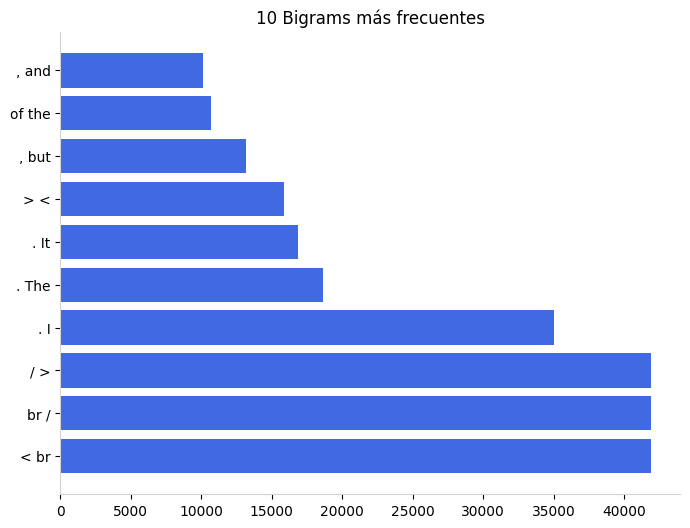

In [58]:
plot_ngrams(common_bigrams, title='10 Bigrams más frecuentes')

In [59]:
# Generar trigrams para todo el texto
trigrams = ngrams(words, 3)
freq_dist_trigrams = FreqDist(trigrams)
common_trigrams = freq_dist_trigrams.most_common(10) # Obtener los 10 trigrams más comunes
print(common_trigrams)

[(('<', 'br', '/'), 41898), (('br', '/', '>'), 41898), (('>', '<', 'br'), 15856), (('/', '>', '<'), 15855), (('/', '>', 'I'), 3619), (('.', 'It', 'is'), 3191), (('.', 'It', "'s"), 2976), (('/', '>', 'The'), 2948), (('.', 'This', 'is'), 2894), (('&', '#', '34'), 2853)]


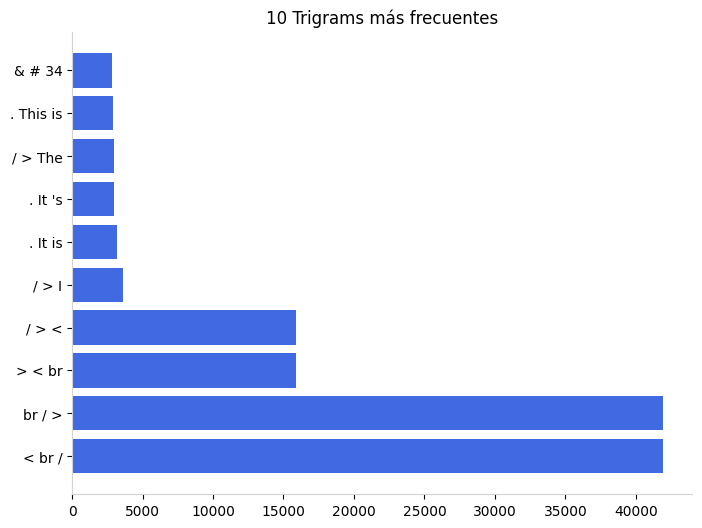

In [60]:
plot_ngrams(common_trigrams, title='10 Trigrams más frecuentes')

## 1.5 Nubes de Palabras

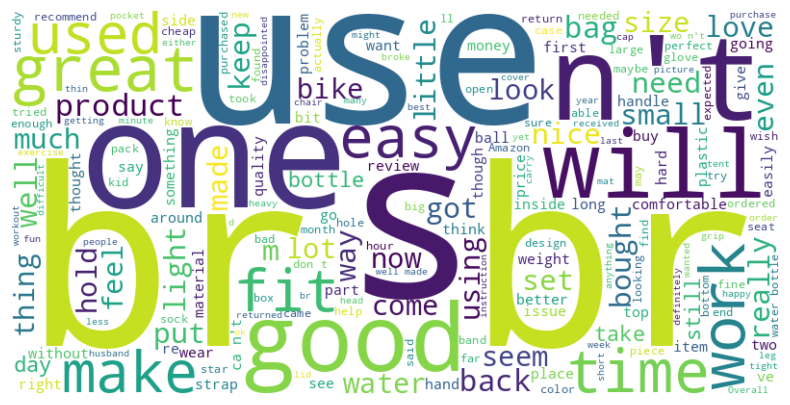

In [64]:
generate_wordcloud(words)

## Limpieza de los datos para Word2Vec

In [76]:
# Verificar entradas que puedan causar la advertencia 'MarkupResemblesLocatorWarning'
for i, text in enumerate(df_balanced['text']):
    if text.startswith('/') or text.startswith('http:') or text.startswith('https:'):
        print(f"Revisar entrada en índice {i}: {text}")

Revisar entrada en índice 9031: https://www.amazon.com/dp/B01KUHTXY6/ref=cm_cr_ryp_prd_ttl_sol_15


In [77]:
clean_text_for_contextual_models(text)

'beautifully crafted well made expert workmanship full tang blade securely set handle sharp securely fits scabbard also work art nice display piece sharp enough real damage'

In [78]:
# Aplicar la función de limpieza a cada review en la columna 'text'
df_balanced['cleaned_text'] = df_balanced['text'].apply(lambda x: clean_text_for_contextual_models(x))

# Verificar los resultados
print(df_balanced[['text', 'cleaned_text']].head(10))

                                                text  \
0  The travel mug was OK, not bad but the coffee ...   
1  I'm terrible with planks so I was terrible at ...   
2  Drawstring immediately ripped inches of stitch...   
3  The black face is cracking and falling off aft...   
4         Leaves white stuff in your hair. Not good!   
5  Too large and not for little girls. More for a...   
6  Update... after charging approximately 3 times...   
7  you may be fooled by soft inner padding, but t...   
8  I purchased two of these.  I put them on my do...   
9  Missing hardware and pieces didn't fit togethe...   

                                        cleaned_text  
0  travel mug ok bad coffee mug team emblem affix...  
1  terrible planks terrible maybe abs need lot st...  
2  drawstring immediately ripped inches stitches ...  
3  black face cracking falling two days poor quality  
4                       leaves white stuff hair good  
5              large little girls adults older teens 

In [79]:
# Concatenar todas las reseñas limpias en un gran texto
all_reviews = ' '.join(df_balanced['cleaned_text'])

# Tokenizar este gran texto
all_words = all_reviews.split()

# Volvemos a obtener la distribución de frecuencia
freq_dist = FreqDist(all_words)

# Imprimimos las palabras más comunes
most_common_words = freq_dist.most_common(50)
print(most_common_words)

[('one', 17187), ('would', 13004), ('like', 12920), ('use', 11507), ('good', 10166), ('great', 9188), ('get', 9081), ('two', 8963), ('well', 8752), ('really', 6828), ('time', 6194), ('water', 6129), ('easy', 5898), ('work', 5878), ('nice', 5844), ('fit', 5759), ('also', 5721), ('much', 5463), ('back', 5462), ('little', 5436), ('product', 5354), ('even', 5298), ('made', 5197), ('used', 5115), ('small', 5080), ('bag', 5060), ('quality', 4986), ('size', 4938), ('could', 4837), ('hundred', 4502), ('three', 4389), ('way', 4305), ('first', 4297), ('better', 4194), ('light', 4185), ('and', 4149), ('put', 4137), ('got', 4117), ('bought', 4037), ('bike', 3927), ('bottle', 3901), ('enough', 3894), ('need', 3735), ('keep', 3734), ('price', 3726), ('set', 3723), ('around', 3551), ('still', 3517), ('using', 3501), ('long', 3436)]


Visualizamos las palabras más comunes tras aplicar la función de limpieza:

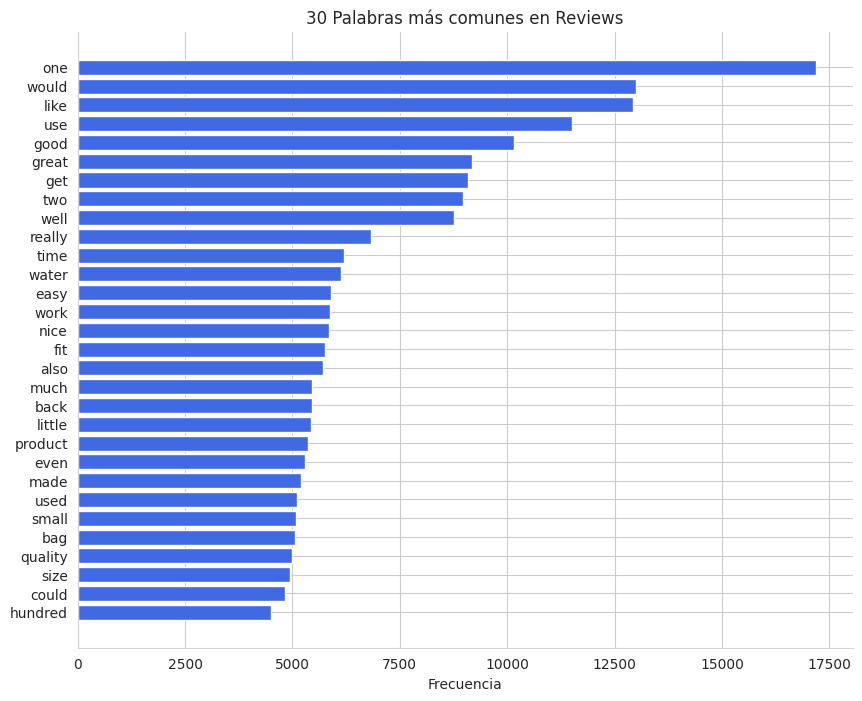

In [80]:
plot_most_common_words(all_words, num_words=30, title='30 Palabras más comunes en Reviews', xlabel='Frecuencia')

## 1.6 Visualización en 2 Dimensiones de Word Embeddings con Word2Vec

In [81]:
cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print(cores)

2


**Configuración de Hiperparámetros e Inicialización del Modelo Word2Vec**

In [82]:
# Inicializamos el modelo Word2Vec con hiperparámetros específicos
w2v_model = Word2Vec(min_count=20,  # Ignorar palabras con una frecuencia total menor
                     window=2,  # Distancia máxima entre la palabra actual y la pronosticada
                     vector_size=300,  # Dimensionalidad de los vectores de palabras
                     sample=6e-5,  # Umbral para configurar cuáles palabras de alta frecuencia son degradadas aleatoriamente
                     alpha=0.03,  # Tasa de aprendizaje inicial
                     min_alpha=0.0007,  # Tasa de aprendizaje que disminuirá linealmente durante el entrenamiento
                     negative=20,  # Si > 0, se usará muestreo negativo, el int para negativo especifica cuántas "palabras ruido" se deben dibujar
                     workers=cores-1)  # Usar 1 core menos para evitar deadlocks

**Construcción del Vocabulario:** Antes de entrenar el modelo, necesitamos construir un vocabulario a partir de las sentencias tokenizadas. Esto implica procesar todas las palabras, filtrarlas según el `min_count` y contar su frecuencia.

In [83]:
sentences = [row.split() for row in df_balanced['cleaned_text']]
sentences[0]

['travel',
 'mug',
 'ok',
 'bad',
 'coffee',
 'mug',
 'team',
 'emblem',
 'affixed',
 'upside',
 'bought',
 'give',
 'gift',
 'ended',
 'one',
 'part',
 'set',
 'usable',
 'giftable',
 'mug',
 'ridiculous',
 'nice',
 'weight',
 'mug',
 'bad',
 'quality',
 'control',
 'waste']

In [84]:
# Construir vocabulario
t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print(f"Tiempo para construir el vocabulario: {round((time() - t) / 60, 2)} mins")
print(f"Vocabulario compuesto por {len(w2v_model.wv)} palabras")

Tiempo para construir el vocabulario: 0.01 mins
Vocabulario compuesto por 5779 palabras


**Entrenar el Modelo**

In [85]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print(f"Tiempo para entrenar el modelo: {round((time() - t) / 60, 2)} mins")

Tiempo para entrenar el modelo: 3.15 mins


**Guardar el modelo**

In [86]:
# Guardar el modelo entrenado en local
w2v_model.save("w2v_model.pkl")

**Haciendo pruebas**

In [87]:
w2v_model.wv.most_similar(positive=["bottle"])

[('bottles', 0.6846336722373962),
 ('drink', 0.6396197080612183),
 ('32oz', 0.6166993379592896),
 ('lid', 0.6002572774887085),
 ('straw', 0.5668834447860718),
 ('drinking', 0.5490100383758545),
 ('chug', 0.5404512286186218),
 ('strainer', 0.5356746315956116),
 ('spout', 0.535466730594635),
 ('jug', 0.5347126126289368)]

In [88]:
w2v_model.wv.most_similar(positive=["sport"])

[('recreational', 0.4161878526210785),
 ('tournament', 0.40120992064476013),
 ('enthusiast', 0.383595734834671),
 ('pucks', 0.37150904536247253),
 ('competitive', 0.35655808448791504),
 ('reminded', 0.3425719738006592),
 ('sports', 0.33741316199302673),
 ('swimmer', 0.3360153138637543),
 ('wilson', 0.332950621843338),
 ('specialized', 0.33292895555496216)]

In [89]:
w2v_model.wv.most_similar(positive=["running"])

[('jogging', 0.49231648445129395),
 ('cycling', 0.45079493522644043),
 ('walking', 0.4221351146697998),
 ('run', 0.4159146249294281),
 ('hiking', 0.3747645318508148),
 ('marathon', 0.3719194233417511),
 ('biking', 0.3629777431488037),
 ('hills', 0.3547118306159973),
 ('walks', 0.35309240221977234),
 ('strenuous', 0.3522879481315613)]

In [90]:
w2v_model.wv.most_similar(positive=["yoga"])

[('manduka', 0.6358885169029236),
 ('studio', 0.6126079559326172),
 ('mat', 0.6052578091621399),
 ('props', 0.6034196019172668),
 ('bolster', 0.5907464623451233),
 ('gaiam', 0.5431934595108032),
 ('poses', 0.5417713522911072),
 ('pilates', 0.5245106816291809),
 ('classes', 0.5166770815849304),
 ('mats', 0.47107359766960144)]

In [91]:
w2v_model.wv.similarity('sport', 'running')

0.119005196

In [92]:
w2v_model.wv.similarity('sport', 'bottle')

-0.012276322

In [93]:
w2v_model.wv.similarity('bottle', 'running')

0.035368744

In [94]:
w2v_model.wv.doesnt_match(['sport', 'running', 'bottle'])

'bottle'

In [95]:
w2v_model.wv.doesnt_match(['running', 'basketball', 'football', 'yoga'])

'running'

**Visualización en 2 Dimensiones de Word Embeddings con Word2Vec**

In [96]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
%matplotlib inline

# Palabras de interés para la visualización
keys = ['sport', 'bottle', 'running', 'love', 'team']

# Obtener los vectores de palabras más similares
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)] for search_term in keys}

embedding_clusters = []
word_clusters = []

for word, similar in similar_words.items():
    embeddings = []
    words = []
    for similar_word in similar:
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

# Convertir a np.array
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

# Aplanar la lista para poder aplicar t-SNE
embeddings_2d = np.array(TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
                          .fit_transform(embedding_clusters.reshape(n * m, k))
                          ).reshape(n, m, 2)

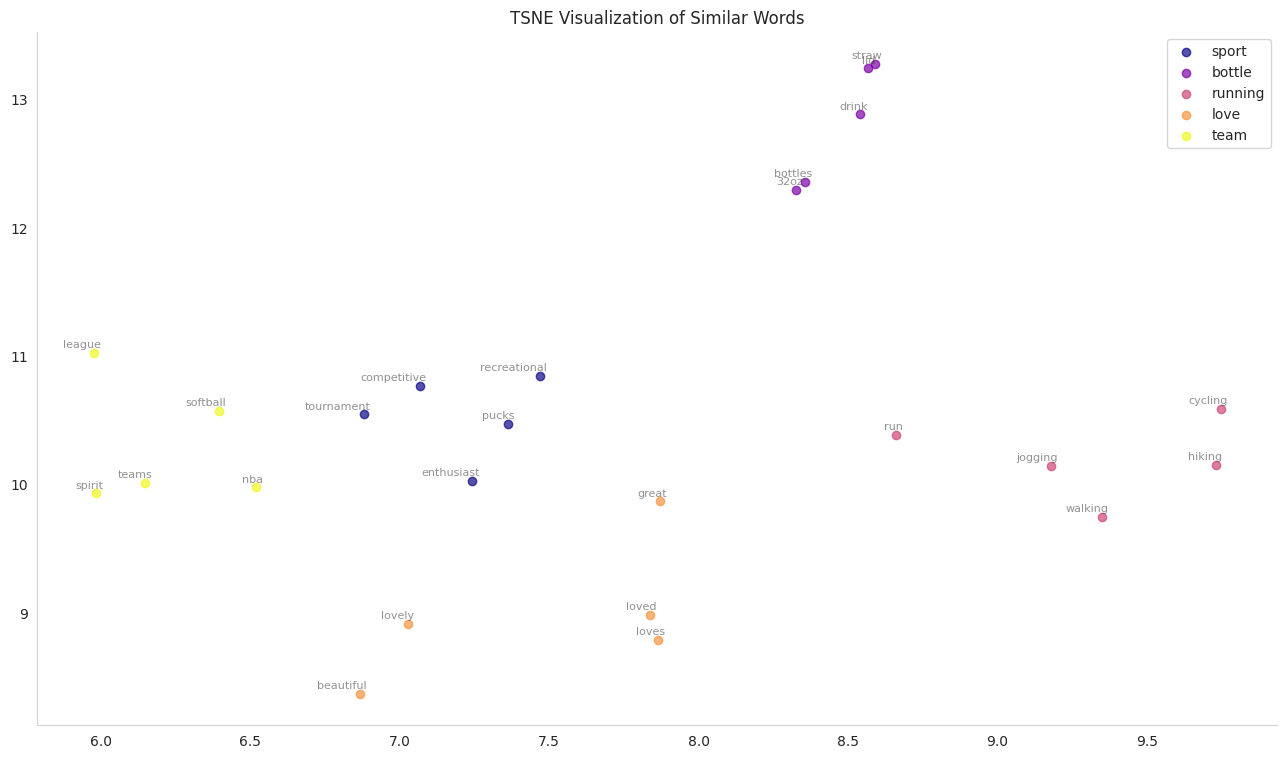

In [138]:
# Visualización de las palabras similares en 2D con t-SNE
tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

Planteado como pipeline reutilizable. La siguiente función toma el modelo Word2Vec y un conjunto de palabras clave para generar una visualización t-SNE para las palabras más similares a las palabras clave. Esto permite que el proceso sea flexible y fácil de repetir con diferentes conjunto de palabras o diferentes modelos Word2Vec:

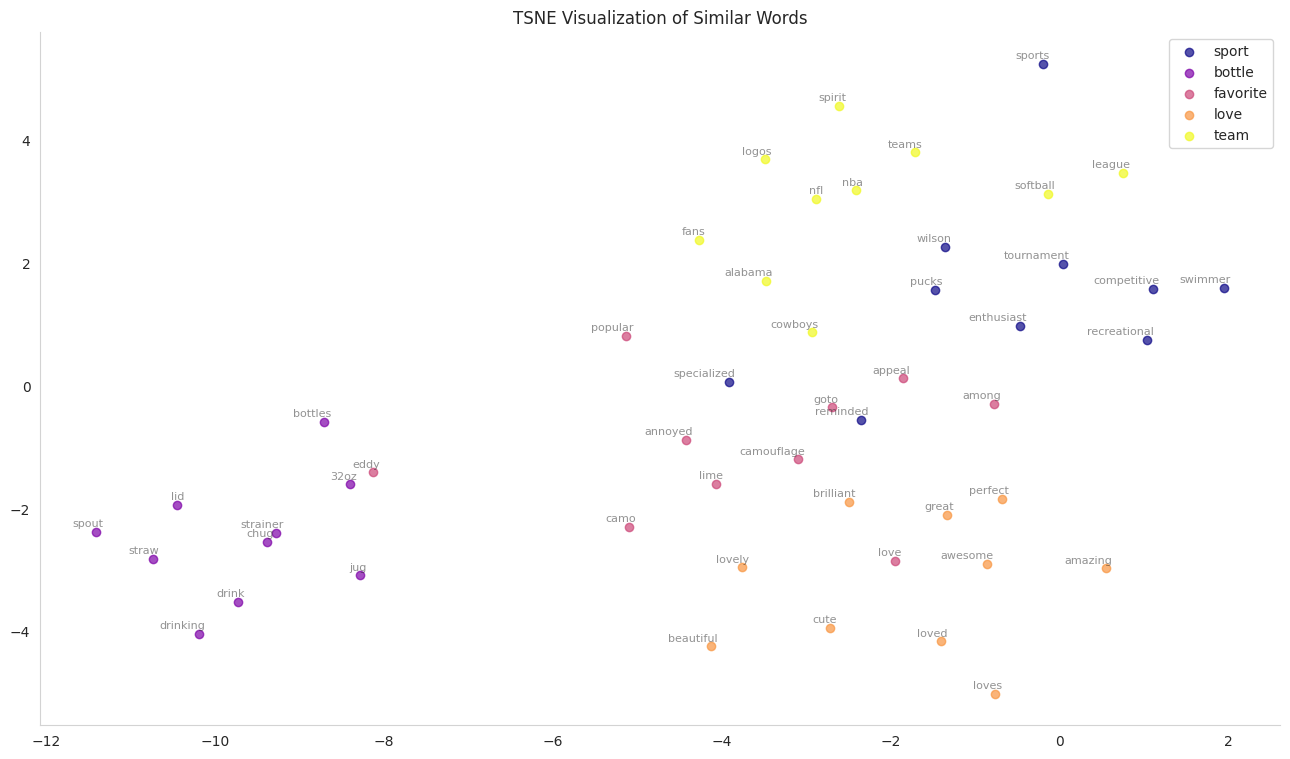

In [140]:
tsne_visualization(w2v_model, ['sport', 'bottle', 'favorite', 'love', 'team'])

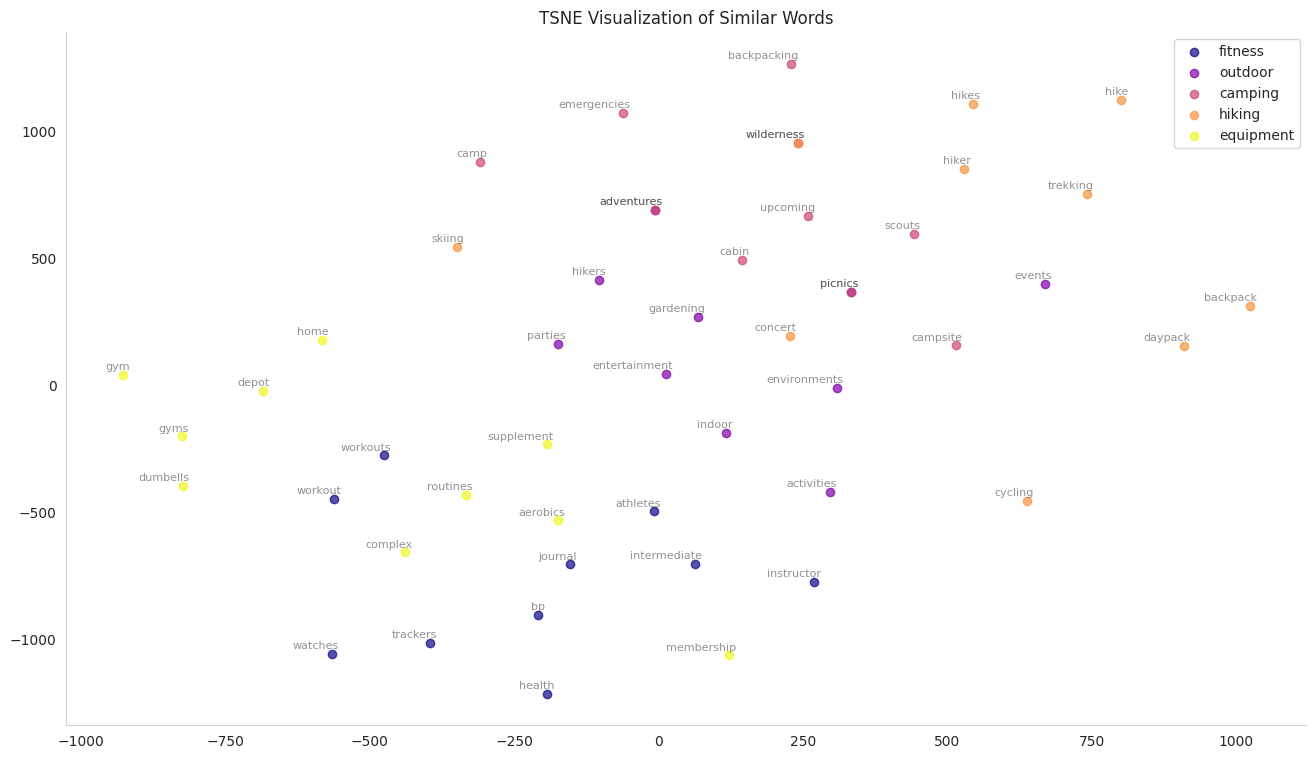

In [141]:
tsne_visualization(w2v_model, ['fitness', 'outdoor', 'camping', 'hiking', 'equipment'])

## Exploración después de Limpieza de los Datos

In [143]:
# Tokenizamos el texto
all_words = [word for text in df_balanced['cleaned_text'] for word in word_tokenize(text)]

In [144]:
vocab = Counter(all_words)
print(f"Número total de palabras únicas: {len(vocab)}")

Número total de palabras únicas: 46133


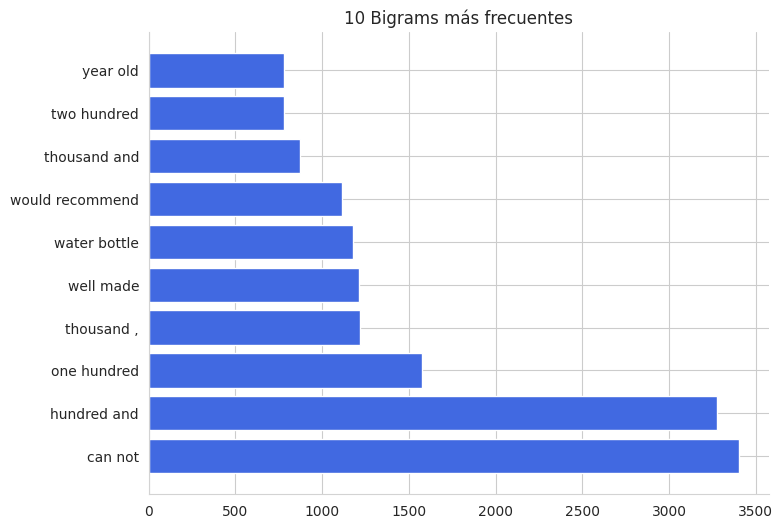

In [145]:
# Generar bigrams para todo el texto
common_bigrams = FreqDist(ngrams(all_words, 2)).most_common(10)
plot_ngrams(common_bigrams, title='10 Bigrams más frecuentes')

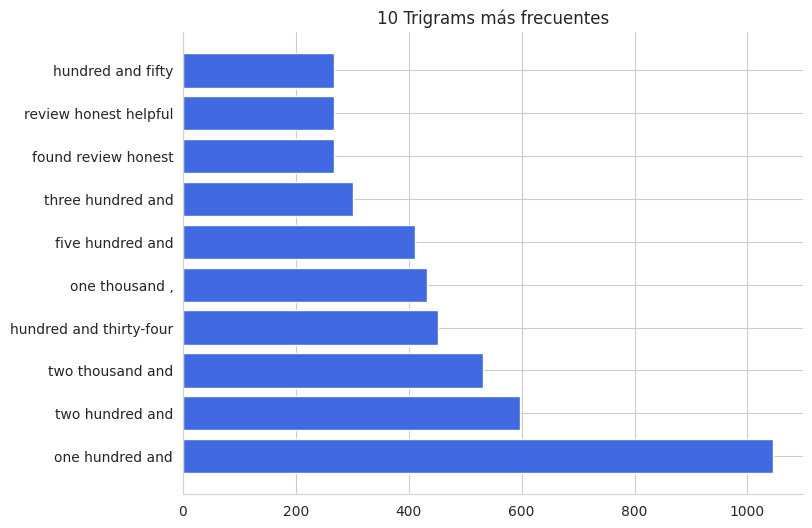

In [146]:
# Generar trigrams para todo el texto
common_trigrams = FreqDist(ngrams(all_words, 3)).most_common(10)
plot_ngrams(common_trigrams, title='10 Trigrams más frecuentes')

In [148]:
# Aplicar la nueva función de limpieza para excluir números
df_balanced['cleaned_text_exclude_numbers'] = df_balanced['text'].apply(lambda x: clean_text_exclude_numbers(x))

# Ver los resultados
print(df_balanced[['text', 'cleaned_text_exclude_numbers']].head(10))

                                                text  \
0  The travel mug was OK, not bad but the coffee ...   
1  I'm terrible with planks so I was terrible at ...   
2  Drawstring immediately ripped inches of stitch...   
3  The black face is cracking and falling off aft...   
4         Leaves white stuff in your hair. Not good!   
5  Too large and not for little girls. More for a...   
6  Update... after charging approximately 3 times...   
7  you may be fooled by soft inner padding, but t...   
8  I purchased two of these.  I put them on my do...   
9  Missing hardware and pieces didn't fit togethe...   

                        cleaned_text_exclude_numbers  
0  travel mug ok bad coffee mug team emblem affix...  
1  terrible plank terrible maybe ab need lot stre...  
2  drawstring immediately ripped inch stitch prod...  
3       black face cracking falling day poor quality  
4                         leaf white stuff hair good  
5                 large little girl adult older teen 

In [149]:
# Tokenizamos el texto
all_words = [word for text in df_balanced['cleaned_text_exclude_numbers'] for word in word_tokenize(text)]
print(f"Número total de palabras únicas: {len(Counter(all_words))}")

Número total de palabras únicas: 42049


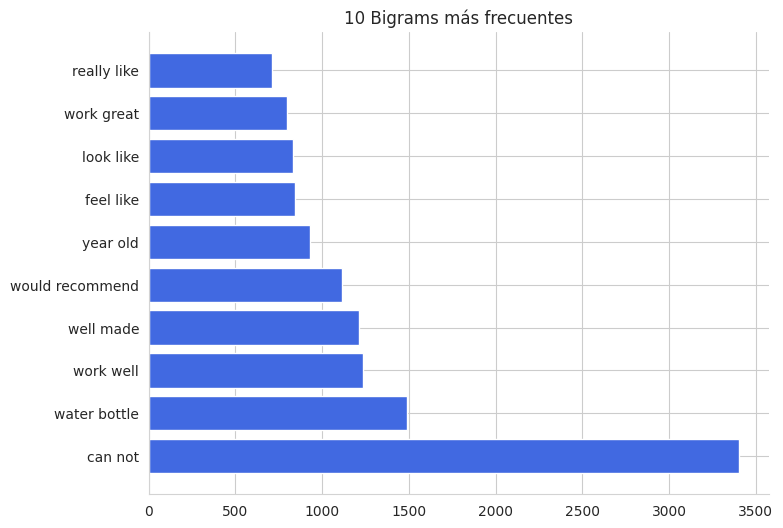

In [150]:
# Generar bigrams para todo el texto
common_bigrams = FreqDist(ngrams(all_words, 2)).most_common(10)
plot_ngrams(common_bigrams, title='10 Bigrams más frecuentes')

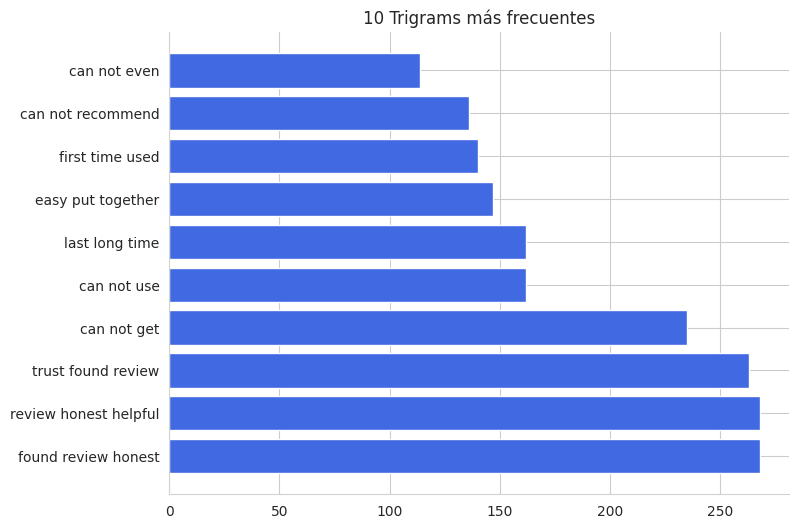

In [151]:
# Generar trigrams para todo el texto
common_trigrams = FreqDist(ngrams(all_words, 3)).most_common(10)
plot_ngrams(common_trigrams, title='10 Trigrams más frecuentes')

Después de aplicar la limpieza para excluir los números, los bigramas y trigramas más comunes muestran de manera más precisa el contenido temático relacionado con los productos de deporte y aire libre. La función parece haber sido efectiva en eliminar la influencia de los números en el análisis de los n-gramas, lo que puede ofrecer una visión más clara de las opiniones y características más mencionadas en las reseñas.

En el contexto de las reseñas de productos de deporte y aire libre, algunos n-gramas como "well made" o "water bottle" podrían tener un valor semántico significativo porque proporcionan información directamente relacionada con la calidad de un producto o mencionan productos específicos. Sin embargo, otros n-gramas como "can not" pueden considerarse de poco valor semántico sin un contexto adicional, ya que no aportan información específica sobre el producto o la experiencia del usuario.

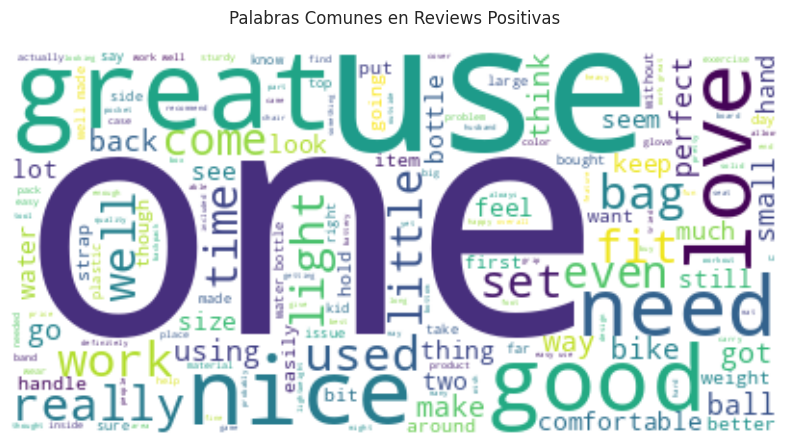

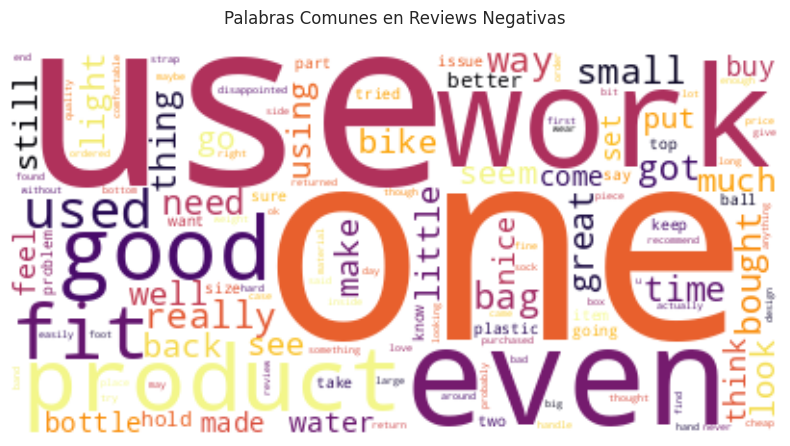

In [152]:
positive_reviews = ' '.join(df_balanced[df_balanced['rating'] >= 4]['cleaned_text_exclude_numbers'])
negative_reviews = ' '.join(df_balanced[df_balanced['rating'] < 4]['cleaned_text_exclude_numbers'])

# Generar word cloud para reviews positivas
wordcloud_pos = WordCloud(background_color='white',colormap = "viridis").generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Comunes en Reviews Positivas', pad=20)
plt.show()

# Generar word cloud para reviews negativas
wordcloud_neg = WordCloud(background_color='white',colormap = "inferno").generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Comunes en Reviews Negativas', pad=20)
plt.show()

## 1.7 Otras visualizaciones

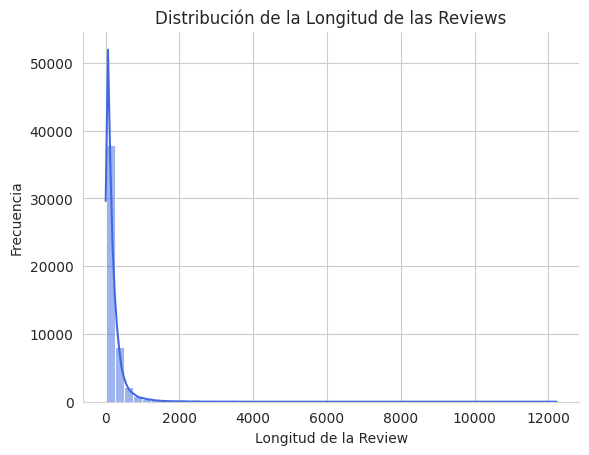

In [162]:
# Distribución de la Longitud de las Reviews
plot_review_length_distribution(df_balanced, 'cleaned_text_exclude_numbers')

Podemos hacer también un análisis de votos de utilidad vs ratings, ya que puede indicar si las reviews más útiles tienden a ser más positivas o negativas:

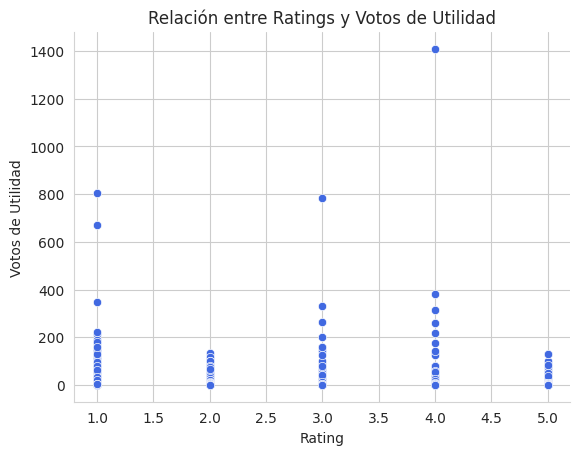

In [163]:
plot_rating_helpfulness(df_balanced)

Comparar la cantidad de reviews verificadas frente a no verificadas puede ofrecer insights sobre la autenticidad de las opiniones:

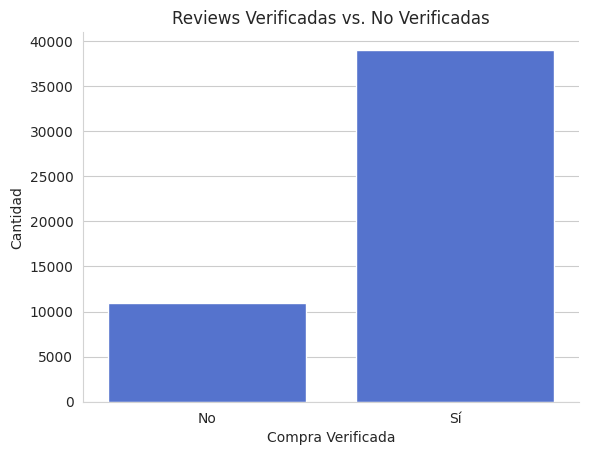

In [164]:
plot_verified_purchase_distribution(df_balanced)

## 1.8 Guardar Dataframe con las nuevas columnas

In [165]:
print(df_balanced.columns)

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'sentiment',
       'cleaned_text', 'cleaned_text_exclude_numbers', 'text_length'],
      dtype='object')


In [168]:
save_data_local(df_balanced, "sample_data_balanced_complete.csv")

DataFrame guardado localmente como: sample_data_balanced_complete.csv


In [171]:
with open('sample_data_balanced_complete.csv', 'rb') as f_in:
    with gzip.open('sample_data_balanced_complete.csv.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

## 1.9 Conclusiones

### Conclusiones del primer análisis (10.000 reviews sin balancear)

**Distribución de Ratings:** La mayoría de las reviews son muy positivas, donde las reviews de 5 estrellas dominan ampliamente el conjunto de datos. Esto puede indicar que los clientes están generalmente satisfechos con los productos de deporte y aire libre que adquieren en Amazon o que existe una tendencia a publicar reseñas cuando la experiencia es positiva.

**Longitud de las Reviews:** La mayoría de las reviews son breves, como lo muestra la distribución con una clara tendencia hacia las longitudes más cortas. Esto es común en las plataformas de e-commerce donde los usuarios tienden a dejar comentarios concisos.

**Frecuencia de Bigrams y Trigrams:** Los bigrams y trigrams más frecuentes sugieren que las palabras positivas como "work well", "highly recommend", "great product" son comunes, lo que refuerza la observación de que la mayoría de las reviews son positivas.

**Relación entre Ratings y Votos de Utilidad:** Existe una concentración de votos de utilidad en las reviews con puntuaciones más altas, indicando que los usuarios encuentran más útiles las reviews positivas, o que las reviews positivas son más frecuentes y, por lo tanto, tienen más oportunidades de recibir votos.

**Análisis de Sentimientos:** Hay una proporción significativa de reviews positivas en comparación con las negativas, con 7926 positivas frente a 2074 negativas, reforzando la idea de que la satisfacción general es alta.

**Nube de Palabras:** Las palabras comunes en las reviews positivas y negativas pueden proporcionar una visión del lenguaje utilizado en diferentes contextos sentimentales. Por ejemplo, palabras como "love" y "good" son prominentes en las positivas, mientras que "day" y "back" aparecen en las negativas, lo cual podría indicar problemas o devoluciones.

**Cardinalidad del Vocabulario:** Con 15416 palabras únicas, el conjunto de datos tiene una rica diversidad léxica que podría ser útil para el modelado lingüístico y el análisis de tendencias.

<br>

### Conclusiones tras ajustes y análisis ampliado

**Distribución de Ratings:** Al analizar una muestra más grande y balanceada de reviews, se observa que la percepción de los usuarios es variada, abarcando un espectro completo desde experiencias negativas hasta altamente positivas. Esto proporciona una visión más equilibrada de la satisfacción del cliente y resalta la importancia de una muestra representativa para evaluar correctamente los productos.

**Longitud de las Reviews:** Se confirma que las reseñas tienden a ser concisas, lo que podría reflejar la preferencia de los usuarios por comunicar sus experiencias de manera directa, o puede deberse a la naturaleza del medio, que favorece la brevedad.

**Frecuencia de Bigrams y Trigrams:** Los n-grams frecuentes indican ciertas tendencias en las opiniones de los usuarios. Al eliminar los números y considerar palabras de poco valor semántico, se destaca un vocabulario más cualitativo y enfocado en las características del producto, como "well made", "work well" y expresiones de recomendación. Esto sugiere que, independientemente de la calificación, los usuarios suelen comentar sobre la funcionalidad y calidad de los productos.

**Relación entre Ratings y Votos de Utilidad:** Las reseñas con calificaciones más altas tienden a recibir más votos de utilidad, lo que puede reflejar una tendencia de los usuarios a valorar más las experiencias positivas, o simplemente puede ser un reflejo de la mayor cantidad de reseñas positivas presentes en la plataforma.

**Análisis de Sentimientos:** La presencia balanceada de opiniones positivas y negativas brinda una base sólida para futuros análisis de sentimiento y entrenamiento de modelos predictivos, garantizando que se tenga en cuenta una amplia gama de opiniones de usuarios.

**Nube de Palabras:** La nube de palabras refleja un vocabulario diverso y específico que caracteriza a las reseñas de productos de deporte y aire libre, lo que podría ser de gran utilidad para extraer insights más refinados sobre las percepciones de los clientes.

**Cardinalidad del Vocabulario:** La diversidad léxica sigue siendo un aspecto relevante del conjunto de datos, ofreciendo oportunidades para el modelado de lenguaje natural y el análisis de tendencias, con una representación más fidedigna de la variedad en las expresiones de los usuarios.

**Consideraciones Generales:** La inclusión de herramientas de `utils` ha mejorado la reutilización del código y la limpieza de los notebooks, resultando en un flujo de trabajo más estructurado y eficiente. El proceso de análisis se ha beneficiado de una mayor automatización y estandarización, lo que facilita la replicabilidad y la extensión del estudio a conjuntos de datos similares.